In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def Histogram(image):
    values = [0]*256
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            values[image[i, j]] += 1
    return values
    
def Equalize(input_image):
    
    image = input_image.copy();
    image = np.asarray(image) 
    hist = np.bincount(image.flatten(), minlength=256)
    n_pixels = np.sum(hist)
    hist = hist / n_pixels
    cdf = np.cumsum(hist)
    cdf_m = np.floor(255 * cdf).astype(np.uint8)
    img_list = list(image.flatten())
    
    eq_img_list = [cdf_m[p] for p in img_list]
        
    result = np.reshape(np.asarray(eq_img_list), image.shape)
    
    return result

In [7]:
img = cv.imread("images/Lenna_512.png",0)
Equal_image = Equalize(img)
histogram1 = Histogram(img)
histogram2 = Histogram(Equal_image)

Text(0.5, 1.0, 'equalized_image')

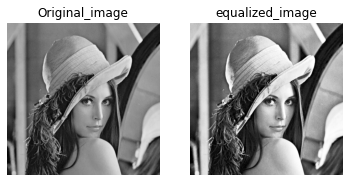

In [8]:
x = np.linspace(0, 255, num=256)
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img ,cmap='gray')
plt.axis('off')
plt.title("Original_image")

fig.add_subplot(1,2,2)
plt.imshow(Equal_image ,cmap='gray')
plt.axis('off')
plt.title("equalized_image")